### <h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 13 </h1>
<h1><center>  Esercitazione: </h1>  
<h1><center>  Seaborn e Lambda Expressions </h1> 
<h1><center> 8 Marzo 2023 </h1>

# Lambda expressions

* riprendiamo l'esempio della lezione precedente


<table><tr>
<td> <img src="Figures/Programma1.jpg" style="width:600px;height:400px;"/>
<td> <img src="Figures/Programma2.jpg" style="width:600px;height:400px;"/>
</tr></table>

* supponiamo di voler trovare, all'interno del documento, tutti i tag caratterizzati da X attributi

# Lambda expressions


* i tag possono essere individuati per nome o in base al valore delle proprietà
* in questo caso il criterio di ricerca è diverso

In [5]:
from bs4 import BeautifulSoup

with open("Files/doc.html") as fp:
    soup = BeautifulSoup(fp, "html.parser")

soup.find_all(lambda tag: len(tag.attrs) == 3)



[<a class="element" href="http://example.com/element1" id="link1">1</a>,
 <a class="element" href="http://example.com/element2" id="link2">2</a>,
 <a class="avatar" href="http://example.com/avatar1" id="link3">3</a>]

# Lambda expressions

In [6]:
elems = soup.findAll(lambda tag:[a for a in tag.attrs if a[0].startswith('c')])
print(elems)

[<p class="title"><b>Laboratorio di Web Scraping </b></p>, <a class="element" href="http://example.com/element1" id="link1">1</a>, <a class="element" href="http://example.com/element2" id="link2">2</a>, <a class="avatar" href="http://example.com/avatar1" id="link3">3</a>]


In [7]:
matched_tags = soup.find_all(lambda tag: "Web" in tag.text)

for matched_tag in matched_tags:
       print("Matched:", matched_tag)
        

Matched: <html>
<head>
<title>Head's title</title>
</head>
<body>
<p class="title"><b>Laboratorio di Web Scraping </b></p>
<a class="element" href="http://example.com/element1" id="link1">1</a>
<a class="element" href="http://example.com/element2" id="link2">2</a>
<a class="avatar" href="http://example.com/avatar1" id="link3">3</a>

<p> Buon lavoro!</p>
</body>
</html>
Matched: <body>
<p class="title"><b>Laboratorio di Web Scraping </b></p>
<a class="element" href="http://example.com/element1" id="link1">1</a>
<a class="element" href="http://example.com/element2" id="link2">2</a>
<a class="avatar" href="http://example.com/avatar1" id="link3">3</a>

<p> Buon lavoro!</p>
</body>
Matched: <p class="title"><b>Laboratorio di Web Scraping </b></p>
Matched: <b>Laboratorio di Web Scraping </b>


# Accedere agli attributi dei tag

In [8]:
soup.body.p.attrs


{'class': ['title']}

In [ ]:
soup.body.p.attrs['class']


* la funzione **attrs** restituisce un dizionario con tutti gli attributi di un oggetto
* l'accesso al dizionario è effettuato come in Python

# Scraping di un singolo dominio

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://en.wikipedia.org/wiki/Carlo_Verdone')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find_all('a'):
   if 'href' in link.attrs:
       print(link.attrs['href'])
        

#bodyContent
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Carlo+Verdone
/w/index.php?title=Special:UserLogin&returnto=Carlo+Verdone
/w/index.php?title=Special:CreateAccount&returnto=Carlo+Verdone
/w/index.php?title=Special:UserLogin&returnto=Carlo+Verdone
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Special:WhatLinksHere/Carlo_Verdone
/wiki/Special:RecentChangesLinked/Carlo_Verdone
/wiki/Wikipedia:File_Upload_Wizard
/wiki/Special:SpecialPages
/w/index.php?title=Carlo_Verdone&

* tuttavia vi sono informazioni che non riguardano l'attore, ma Wikipedia

* come individuare i link che sono di reale interesse?

* occorre analizzare il documento per individuare proprietà di questi link
    * la **URL** inizia con **/wiki**
    * la **URL** non contiene il carattere "due punti"
* utile l'utilizzo di **REGEX**

# Scraping di un singolo dominio

In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
html = urlopen('http://en.wikipedia.org/wiki/Carlo_Verdone')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find('div', {'id':'bodyContent'}).find_all('a', href=re.compile('^(/wiki/)((?!:).)*$')):
    if 'href' in link.attrs:
        print(link.attrs['href'])
        

/wiki/Rome
/wiki/Christian_De_Sica
/wiki/Fun_Is_Beautiful
/wiki/Bianco,_rosso_e_Verdone
/wiki/Talcum_Powder_(film)
/wiki/Maledetto_il_giorno_che_t%27ho_incontrato
/wiki/My_Best_Enemy_(2006_film)
/wiki/Me,_Them_and_Lara
/wiki/Rome
/wiki/Liceo_classico
/wiki/Christian_De_Sica
/wiki/Sapienza_University_of_Rome
/wiki/Centro_Sperimentale_di_Cinematografia
/wiki/Television
/wiki/Advertising
/wiki/Carosello
/wiki/Un_sacco_bello
/wiki/Bianco,_rosso_e_Verdone
/wiki/Sergio_Leone
/wiki/Ennio_Morricone
/wiki/Alberto_Sordi
/wiki/Troppo_forte
/wiki/Sergio_Leone
/wiki/Commedia_all%27italiana
/wiki/Commedia_all%27italiana
/wiki/Manuale_d%27amore
/wiki/Manuale_d%27amore_2_-_Capitoli_successivi
/wiki/Manuale_d%27amore_3
/wiki/Giovanni_Veronesi
/wiki/Paolo_Sorrentino
/wiki/The_Great_Beauty
/wiki/Blessed_Madness
/wiki/Menotti_(artist)
/wiki/Christian_De_Sica
/wiki/A.S._Roma
/wiki/Italian_Socialist_Party
/wiki/Democratic_Party_(Italy)
/wiki/Actor
/wiki/Film_director
/wiki/Screenwriter
/wiki/La_Luna_(1979_f

* una **regex** per filtrare i dati di interesse
* l'espressione deve iniziare con la stringa **wiki**
* **?!** simbolo REGEX che indica **non contiene**
* **$** usato alla fine della espressione regolare, indica "va bene qualsiasi sequenza di caratteri, fino alla fine della stringa"

# Scraping di un singolo dominio: seguire i link

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
    bs = BeautifulSoup(html, 'html.parser')
    return bs.find('div', {'id':'bodyContent'}).find_all('a',href=re.compile('^(/wiki/)((?!:).)*$'))
links = getLinks('/wiki/Carlo_Verdone')
while len(links) > 0:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)
    

* si segue un link casuale all'interno della pagina
* provare ad eseguire il codice: aatenzione verrà restituito un gran numero di risultati, il programma va interrotto!

# Esercitazione:  analisi dei TED talks

* **TED: Technology, Entertainment and Design**
* lo slogan **ideas worth spreading**
* una organizzazione **no profit** il cui obiettivo è la diffusione di idee  che vale la pena diffondere
    * scienza, socità, innovazione, arte, uguaglianza, cultura,..
    * fondata nel 1984
* interventi di al massimo 18 minuti: discorsi brevi e efficaci
* esitono TED in più di 100 lingue, molti sottotitolati

# Esercitazione:  librerie utilizzate

* **seaborn**
 <code>
 import seaborn as sns
 </code>
* una libreria avanzata per il plotting, basata su **Matplotlib**      
    * integrata con **Pandas**
    * opera su **dataframes** e **array**     
* **wordcloud**
    * generazione di **tag clouds**
    * reppresentazione di dati testuali in cui la dimensione di ogni parola indica la sua frequenza o importanza all'interno di un testo
   

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Esercitazione:  importare il DataSet

In [13]:
df = pd.read_csv('Data/ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

* features disponibili
    * name: nome ufficiale del  TED Talk. Include titolo e spaker
    * title: titolo del talk
    * description: sintesi dell'argomento del talk
    * main_speaker: lo speaker principale (possono essere più di uno)
    * speaker_occupation: l'occupazione dello speaker principale
    * num_speaker: numero degli speaker
    * duration: durata del talk in secondi
    * event: l'evento TED/TEDx dove il talk si è tenuto
    * film_date: il timestamp Unix del momento in cui è iniziata la registrazione del talk
    * published_date: il timestamp Unix della pubblicazione del talk su TED.com
    * comments: numero dei commenti di primo livello fatti per quel talk
    * tags: temi associati a quel talk
    * languages: numero di lingue in cui quel talk è disponibile
    * ratings: un dizionario che rappresenta i rating dati al talk, scelti tra un insieme prefissato di giudizi (inspiring,
      fascinating, jaw dropping, etc.)
    * related_talks: lista di dictionaries dei talk in relazione con questo, raccomandati per la visione
    * url: URL del talk.
    * views: numero di viste ricevute da quel talk

# Esercitazione:  analizzare il DataSet

In [14]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Riordinare le colonne

* è possibile riordinare le colenne in modo da avere i campi più importanti per primi
* è sufficiente indicare nel datdframe una lista di colonne, elencate nell'ordine desiderato

In [15]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 
         'film_date', 'published_date', 
         'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
df.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

# Trasformare un timestamp in una data

In [17]:
import pandas as pd
# Come si crea un oggetto Timestamp
ts = pd.Timestamp(year = 2020,  month = 4, day = 4,
                  hour = 9, second = 49, tz = 'Europe/Berlin')
  
print(ts)


2020-04-04 09:00:49+02:00


In [18]:
# convert to a Timestamp object
ts.fromtimestamp(992345678)

Timestamp('2001-06-12 13:34:38')

# Trasformare i timestamp del dataset in una data

In [19]:
import datetime

import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [20]:
len(df)

2550

# Analisi delle visualizzazioni dei talk

In [21]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

# Talk più visti

* elenco dei 15 talk che hanno raccolto il maggior numero di viste

In [22]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


# i 15 talk più visti: bar plot

* **barplot** analogo a quello di  **Matplotlib**
* **style** definisce lo sfondo della figura

<AxesSubplot: xlabel='abbr', ylabel='views'>

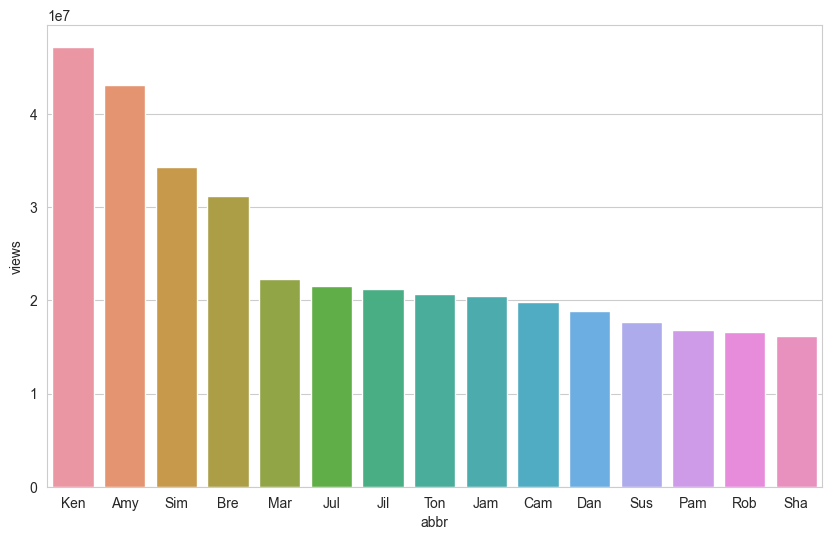

In [24]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

# Distribuzione delle visite: displot

* **displot**: distribution plot, analoghi agli istogrammi di Matplotlib
    * valori sull'asse delle x divisi in **bin**
    * ogni **bin** un range di valori

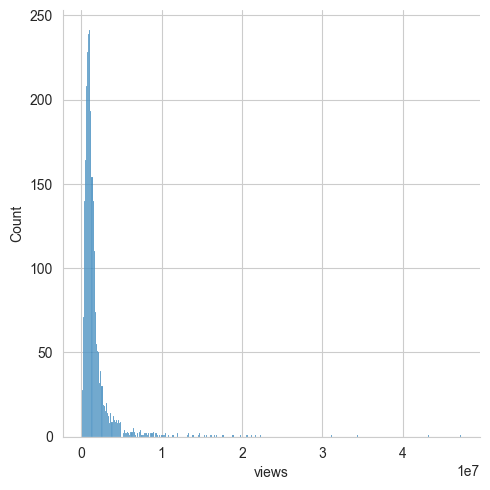

In [25]:
sns.displot(df['views'])

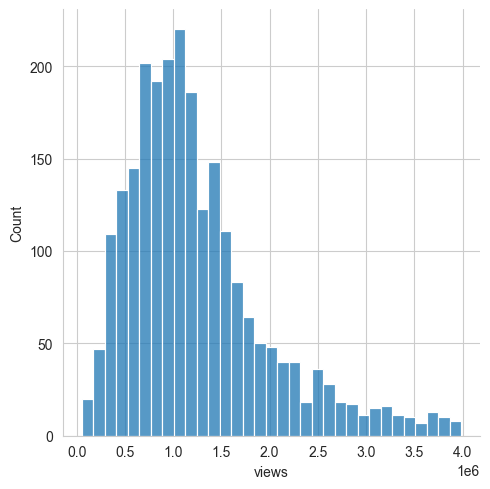

In [26]:
sns.displot(df[df['views'] < 0.4e7]['views'])

# Analisi dei commenti

* solo il numero di commenti disponibile, non il testo dei commenti
    * statistica descrittiva dei commenti
    * **displot (istogramma)**, visualizza la distribuzione dei commenti

In [27]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

# Analisi dei commenti

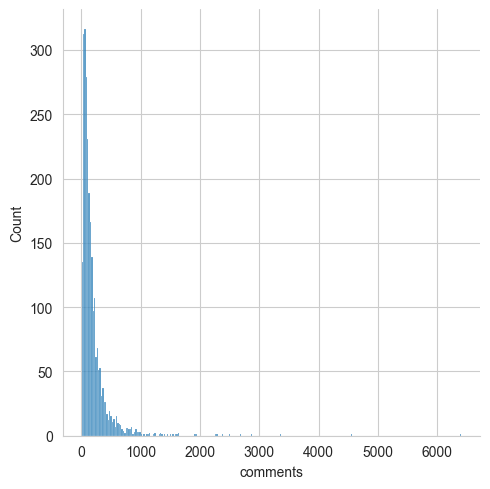

In [28]:
sns.displot(df['comments'])

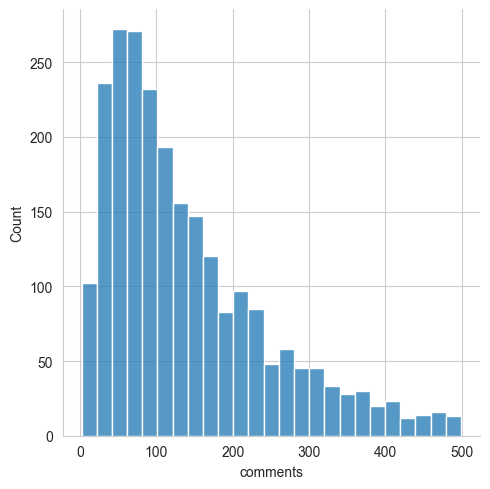

In [29]:
sns.displot(df[df['comments'] < 500]['comments'])

# Correlazione tra numero delle viste e numero dei commenti: joinplot

* utilizzeremo un **joinplot**
    * più visualizzazioni in uno stesso plot
    * la principale una visualizzazione che mostra la relazione che esiste tra due variabili
    * ai lati, gli istogrammi dei valori di ogni variabile


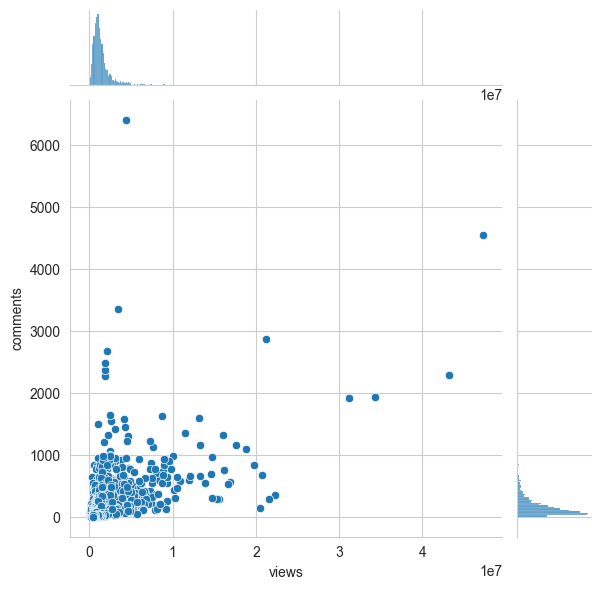

In [30]:
sns.jointplot(x='views', y='comments', data=df)

# Talks con il maggior numero di commenti

In [31]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


# Calcolo del "quoziente di discussione"

* introduciamo un* quoziente di discussione* come il rapporto tra numero di commenti e viste

In [32]:
df['dis_quo'] = df['comments']/df['views']
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


# Analisi degli speaker

* individuare gli speaker con il maggior numero di talk


In [33]:
speaker_df=df.groupby("main_speaker").agg(talks=pd.NamedAgg(column="main_speaker",aggfunc="count"))
print(type(speaker_df))
print(speaker_df)
speaker_df.reset_index(inplace=True)
# print(speaker_df)
# print(type(speaker_df))
speaker_df = speaker_df.sort_values('talks', ascending=False)
speaker_df.head(10)

<class 'pandas.core.frame.DataFrame'>
                     talks
main_speaker              
 OK Go                   1
 Rodrigo y Gabriela      1
 Silk Road Ensemble      1
 Sofi Tukker             1
AJ Jacobs                3
...                    ...
Ziauddin Yousafzai       1
Ziyah Gafić             1
Zubaida Bai              1
eL Seed                  2
iO Tillett Wright        1

[2156 rows x 1 columns]


,main_speaker,talks
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


# Analisi degli speaker: occupazioni

* classificare gli speaker in base alla loro occupazione

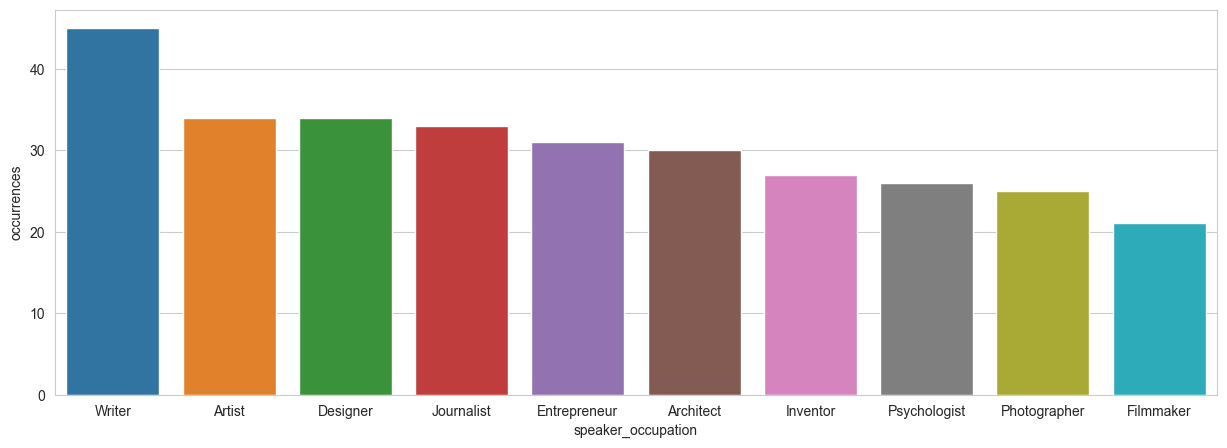

,speaker_occupation,occurrences
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


In [36]:
occupation_df=df.groupby("speaker_occupation").agg(occurrences=pd.NamedAgg(column="speaker_occupation",aggfunc="count"))
occupation_df.reset_index(inplace=True)
occupation_df = occupation_df.sort_values('occurrences', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='speaker_occupation', y='occurrences', data=occupation_df.head(10))
plt.show()
occupation_df.head(10)

# I boxplot

* utilizzati in statistica descrittiva

*  la scatola (il box) è compresa tra il primo e terzo quartile della distribuzione di valori 
    * mostra l’ampiezza della metà centrale della distribuzione 
    * contiene il 50% centrale delle osservazioni effettuate, quelle comprese tra il primo ed il terzo quartile.
    * l'ampiezza della scatola è definita comel **range interquartile (IQR)**
    * la linea all’interno della scatola rappresenta la mediana.


<img src="Figures/BoxPlot.jpg" style="width:1000px;height:400px;"/>

# I boxplot

* i due segmenti che partono dalla scatola e si prolungano verso destra e verso sinistra  sono detti “baffi” (whiskers)

    * indicano la dispersione dei valori inferiori al primo quartile e superiori al terzo quartile non classificati come outliers.

* outliers: rappresentati nel boxplot come dei punti isolati posizionati al di sopra e/o al di sotto dei baffi della distribuzione.

* la scatola permette di capire cosa succede al 50% dei valori osservati

* i baffi aiutano a studiare le code della distribuzione

* i punti isolati indicano i possibili outliers della distribuzione

<img src="Figures/BoxPlot.jpg" style="width:1000px;height:400px;"/>

# I boxplot

* iniziamo con l'illustrare l'uso dei boxplot utilizzando un esempio più semplice.
* un altro datset famose **tip**

In [37]:
df_tips = pd.read_csv('Data/tips.csv')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='day', ylabel='total_bill'>

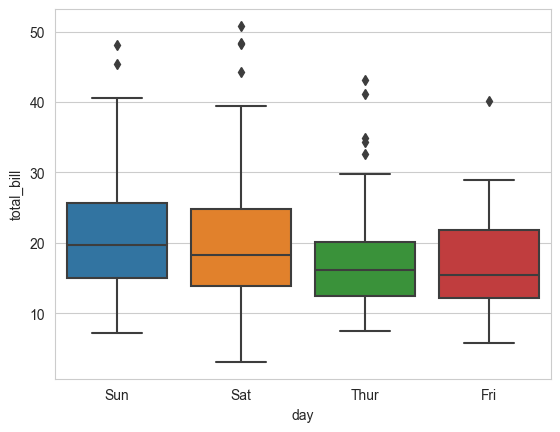

In [38]:
sns.set_style("whitegrid")
sns.boxplot(x = 'day', y = 'total_bill', data = df_tips)

# Relazione tra professioni e numero di viste

* mostrare per ogni tipo di professione, tra le 10 più importanti, la distribuzione delle visualizzazioni che hanno ricevuto i talk fatti da persone che esercitano quella professione

* distribuzione dei valori delle visite per ogni professione

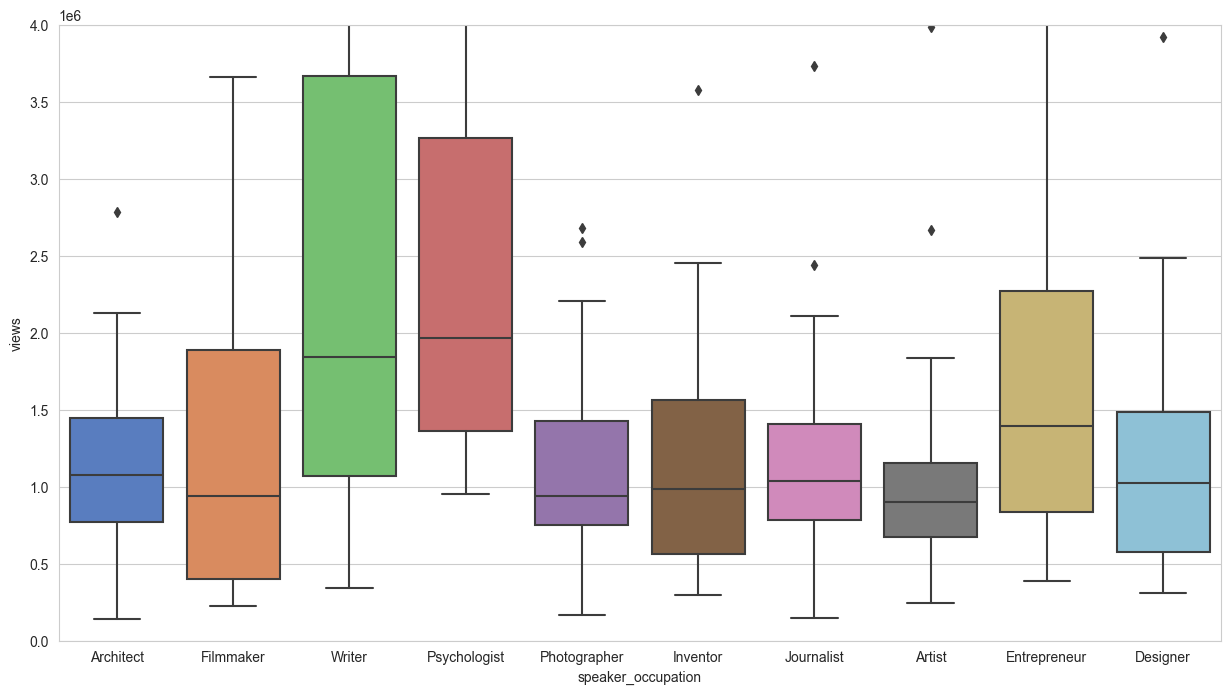

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].
                                                       isin(occupation_df.head(10)['speaker_occupation'])], 
                                                       palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

# Numero di speakers per ogni talk

In [40]:
df['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [41]:
df[df['num_speaker'] == 5][['title', 'description', 'main_speaker', 'event']]

,title,description,main_speaker,event
2507,A dance to honor Mother Earth,Movement artists Jon Boogz and Lil Buck debut ...,Jon Boogz and Lil Buck,TED2017


# TED Languages

In [42]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [43]:
df[df['languages'] == 72]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_quo
973,Matt Cutts: Try something new for 30 days,Try something new for 30 days,"Is there something you've always meant to do, ...",Matt Cutts,Technologist,1,207,TED2011,03-03-2011,01-07-2011,736,"['culture', 'success']",72,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083


# Correlazione tra linguaggi e viste

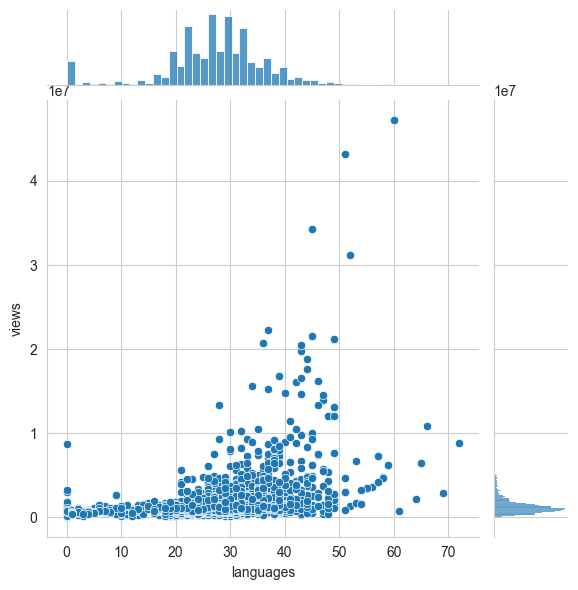

In [44]:
sns.jointplot(x='languages', y='views', data=df)
plt.show()

# Durata dei talk

In [45]:
df['duration'] = df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [46]:
df[df['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_quo
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,03-03-2007,11-06-2008,76,"['culture', 'global issues', 'history', 'langu...",61,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/murray_gell_mann_on_...,785293,0.000097


In [47]:
df[df['duration'] == 87.6]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_quo
640,"Douglas Adams: Parrots, the universe and every...","Parrots, the universe and everything","Blind river dolphins, reclusive lemurs, a parr...",Douglas Adams,"Author, satirist",1,87.6,University of California,16-05-2001,16-03-2010,101,"['biodiversity', 'biology', 'comedy', 'humor',...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/douglas_adams_parrot...,473220,0.000213


# Correlazione tra durata e numero di viste

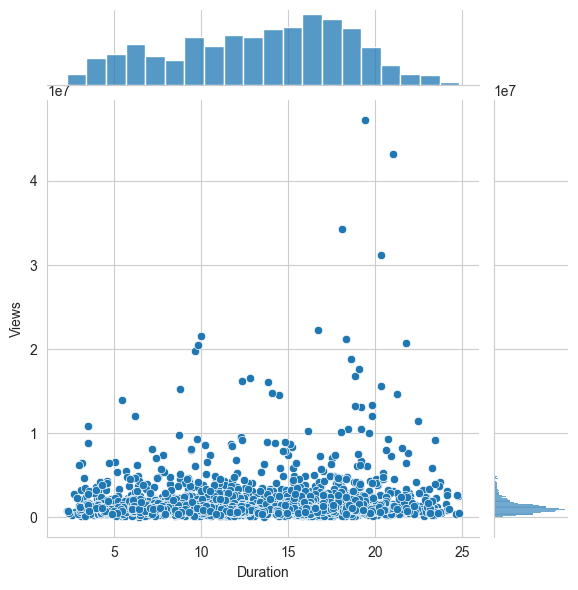

In [48]:
sns.jointplot(x='duration', y='views', data=df[df['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

# Analisi dei transcripts

In [49]:
df2 = pd.read_csv('Data/transcripts.csv')
df2.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [50]:
len(df2)

2467

# Effettuare il join dei due dataset

In [51]:
df3 = pd.merge(left=df,right=df2, how='left', left_on='url', right_on='url')
df3.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_quo,transcript
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Good morning. How are you?(Laughter)It's been ...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,"Thank you so much, Chris. And it's truly a gre..."
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,If you're here today — and I'm very happy that...
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,22-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,"About 10 years ago, I took on the task to teac..."


# Analizzare i transcripts

In [52]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x: len(x.split()))
df3['wc'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

In [53]:
df3['wpm'] = df3['wc']/df3['duration']
df3['wpm'].describe()

count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: wpm, dtype: float64

In [54]:
df3[df3['wpm'] > 245]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,transcript,wc,wpm
441,Mae Jemison: Teach arts and sciences together,Teach arts and sciences together,"Mae Jemison is an astronaut, a doctor, an art ...",Mae Jemison,"Astronaut, engineer, entrepreneur, physician a...",1,14.8,TED2002,02-02-2002,05-05-2009,...,"['art', 'dance', 'education', 'future', 'scien...",20,"[{'id': 24, 'name': 'Persuasive', 'count': 126...","[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mae_jemison_on_teach...,744257,0.000133,What I want to do today is to spend some time ...,3661,247.364865


# Correlazione tra parole e popolarità

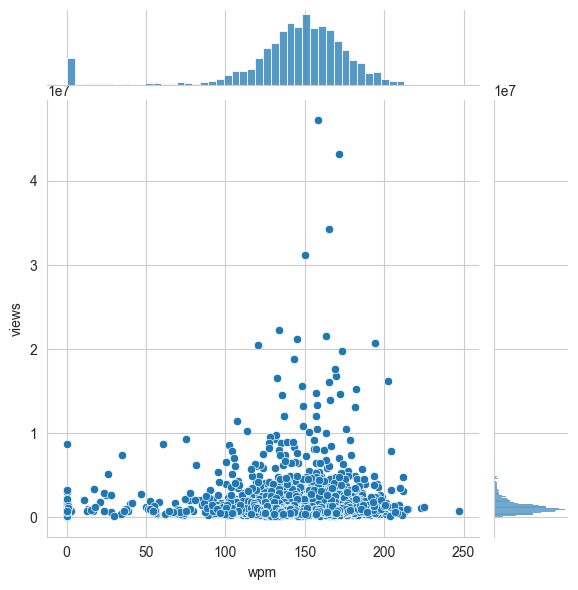

In [55]:
sns.jointplot(x='wpm', y='views', data=df3[df3['duration'] < 25])
plt.show()

# Analizzare la tagcloud

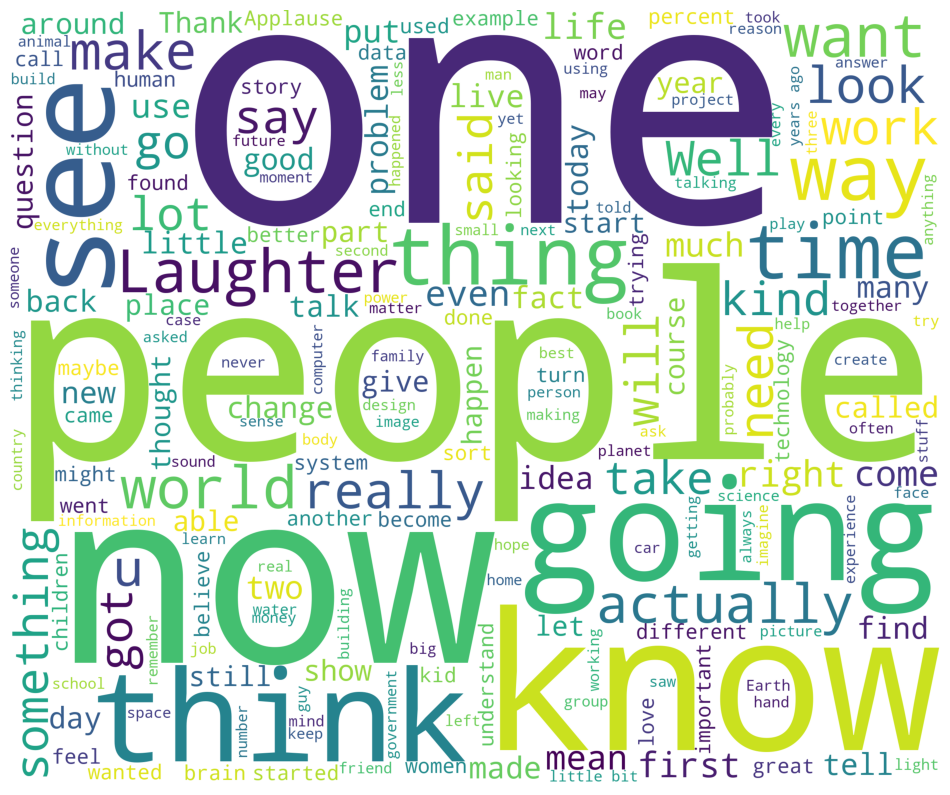

In [56]:
corpus = ' '.join(df2['transcript'])
corpus = corpus.replace('.', '. ')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()